In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.series import Series
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import sys

sys.path.append("../")

from fast_food_nutrition.etl import FastFoodMenuETL
from fast_food_nutrition.model import COLOR, FoodIntakeType, FoodNutritionMapping, Nutrition, Sex
from fast_food_nutrition.viz import FastFoodNutritionVisualizer

In [2]:
etl = FastFoodMenuETL()
menu = etl.load_menu_items()
menu.describe()

,calories,fat,carbohydrates,fiber,protein
count,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,341.264100,14.354969,61.120859,1.844226,13.001611
std,437.434844,27.606401,69.729333,3.961610,20.081804
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,1.000000,24.000000,0.000000,3.000000
50%,270.000000,7.000000,41.000000,1.000000,9.000000
75%,450.000000,21.000000,65.000000,2.000000,18.000000
max,9850.000000,624.000000,616.000000,63.000000,442.000000


In [3]:
menu.dtypes

menu_item        string[python]
calories                float64
fat                     float64
carbohydrates           float64
fiber                   float64
protein                 float64
dtype: object

In [4]:
menu

,menu_item,calories,fat,carbohydrates,fiber,protein
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0
1,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0
2,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0
3,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0
4,Iced Coffee,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1112,Crispy Bell Peppers,80.0,6.0,6.0,0.0,1.0
1113,Harvest Nut Granola,70.0,2.0,10.0,0.0,1.0
1114,Seasoned Tortilla Strips,70.0,4.0,8.0,1.0,1.0
1115,Lemon Parmesan Panko,0.0,0.0,0.0,0.0,0.0


In [8]:
len(menu['menu_item'].unique())

991

In [4]:
duplicate_menu_items = menu.duplicated(subset='menu_item', keep=False)
for _, item in menu[duplicate_menu_items].iterrows():
    print(item['menu_item'])

Iced Coffee
Iced Espresso Classics - Vanilla Latte
Iced Espresso Classics - Caffe Mocha
Iced Espresso Classics - Caramel Macchiato
Tazo® Bottled Berry Blossom White
Tazo® Bottled Black Mango
Tazo® Bottled Black with Lemon
Tazo® Bottled Brambleberry
Tazo® Bottled Giant Peach
Tazo® Bottled Iced Passion
Tazo® Bottled Lemon Ginger
Tazo® Bottled Organic Black Lemonade
Tazo® Bottled Organic Iced Black Tea
Tazo® Bottled Organic Iced Green Tea
Tazo® Bottled Plum Pomegranate
Tazo® Bottled Tazoberry
Tazo® Bottled White Cranberry
Iced Espresso Classics - Vanilla Latte
Iced Espresso Classics - Caffe Mocha
Iced Espresso Classics - Caramel Macchiato
Tazo® Bottled Berry Blossom White
Tazo® Bottled Black Mango
Tazo® Bottled Black with Lemon
Tazo® Bottled Brambleberry
Tazo® Bottled Giant Peach
Tazo® Bottled Iced Passion
Tazo® Bottled Lemon Ginger
Tazo® Bottled Organic Black Lemonade
Tazo® Bottled Organic Iced Black Tea
Tazo® Bottled Organic Iced Green Tea
Tazo® Bottled Plum Pomegranate
Tazo® Bottled Ta

In [5]:
menu.to_csv("/tmp/menu_item.csv")

In [7]:
menu_numeric = menu.drop('menu_item', axis=1)

In [6]:
menu_numeric

,calories,fat,carbohydrates,fiber,protein
0,45.0,0.0,11.0,0.0,0.0
1,80.0,0.0,18.0,1.0,0.0
2,60.0,0.0,14.0,1.0,0.0
3,110.0,0.0,28.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1112,80.0,6.0,6.0,0.0,1.0
1113,70.0,2.0,10.0,0.0,1.0
1114,70.0,4.0,8.0,1.0,1.0
1115,0.0,0.0,0.0,0.0,0.0


## Scatterplots

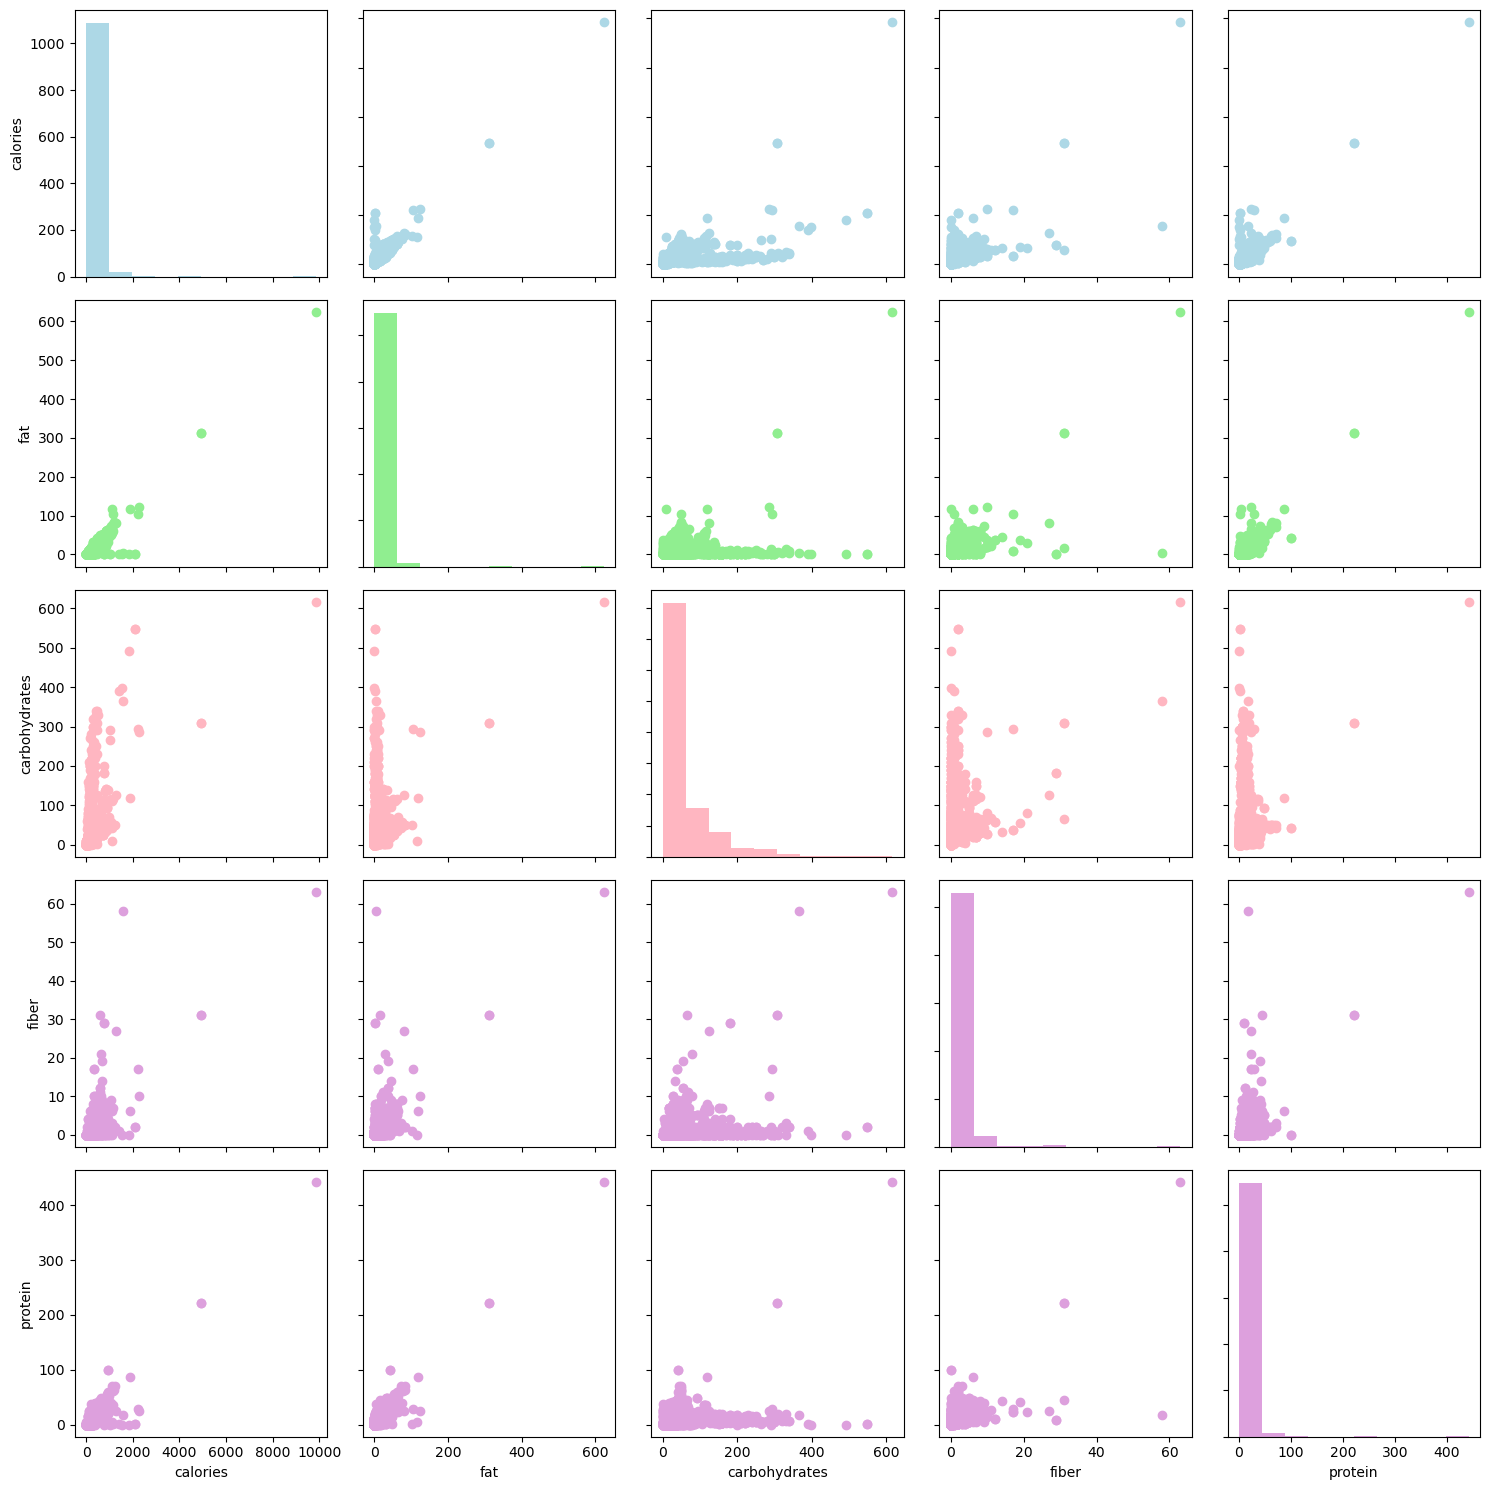

In [7]:
FastFoodNutritionVisualizer.generate_scatter_plots(menu)

In [4]:
## Boxplots

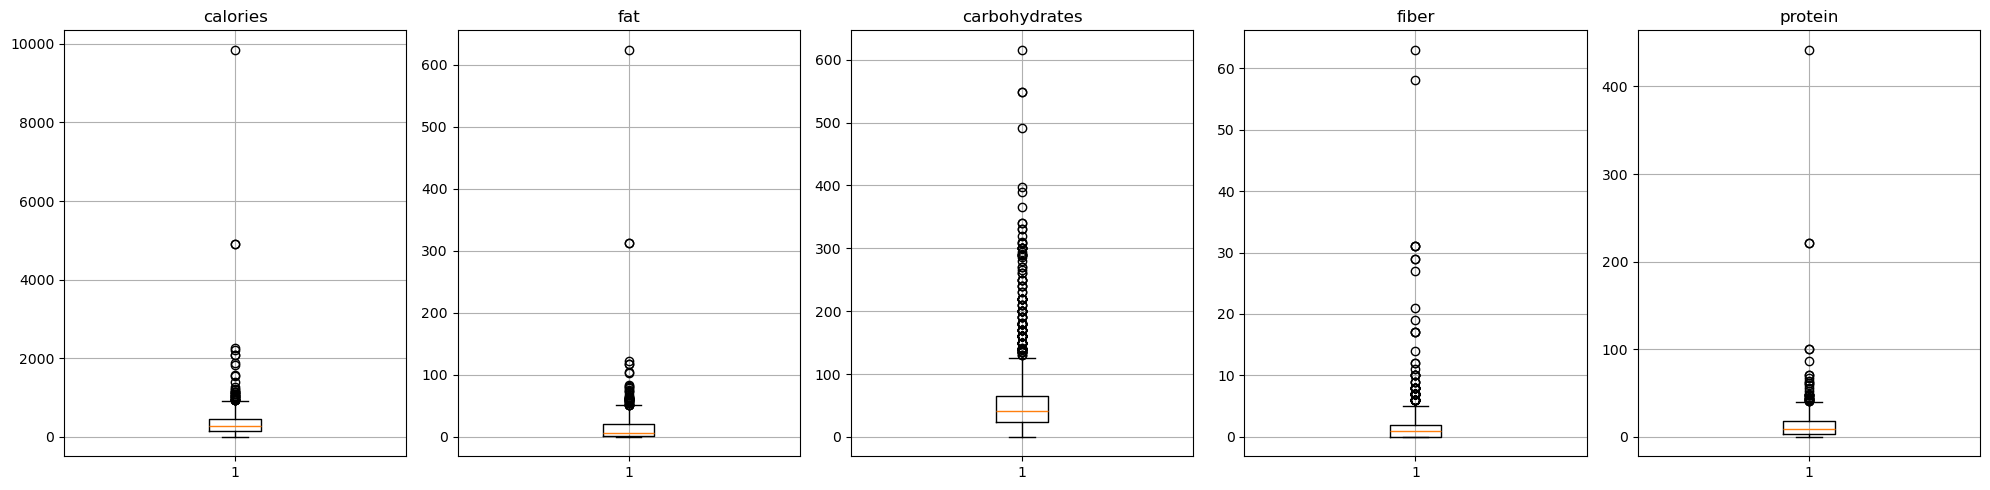

In [5]:
FastFoodNutritionVisualizer.generate_box_plot(menu)

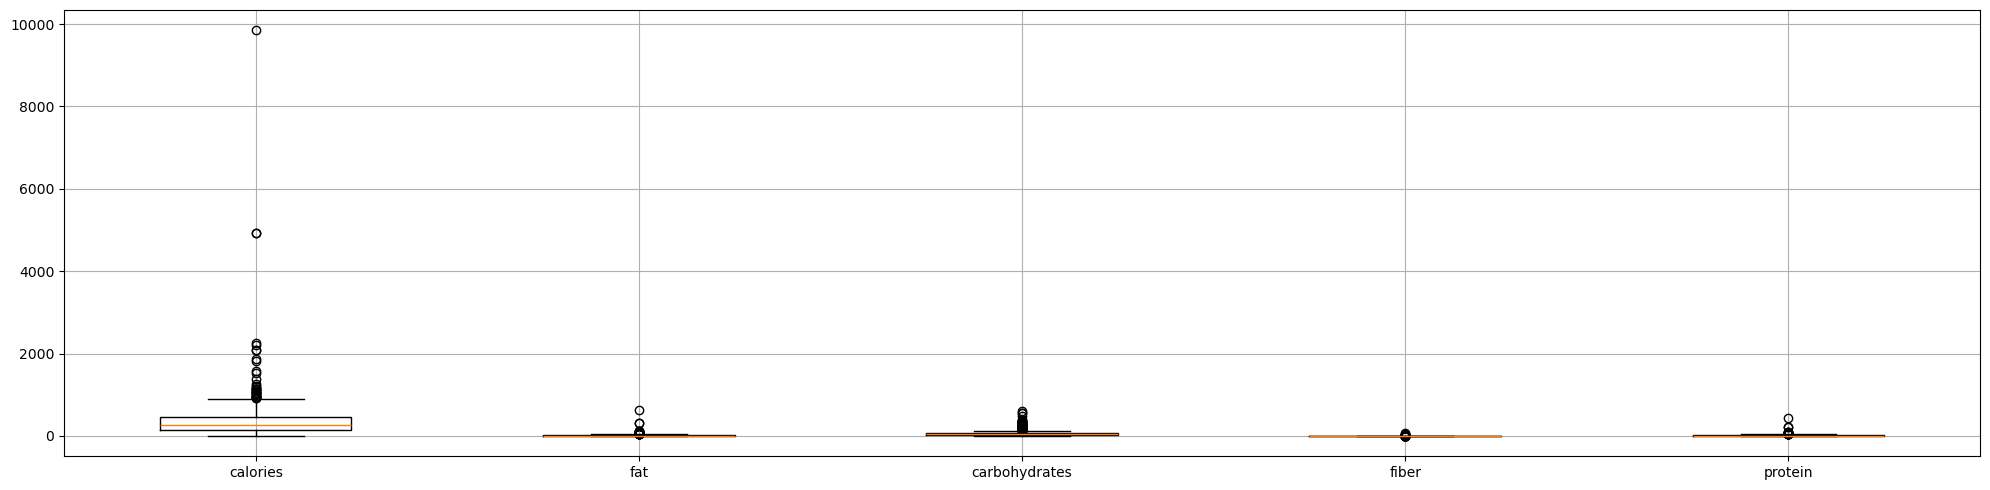

In [6]:
FastFoodNutritionVisualizer.generate_box_plot(menu, merge=True)

In [9]:
FastFoodNutritionVisualizer.generate_histogram_plots(menu)

AttributeError: type object 'FastFoodNutritionVisualizer' has no attribute 'generate_histogram_plots'

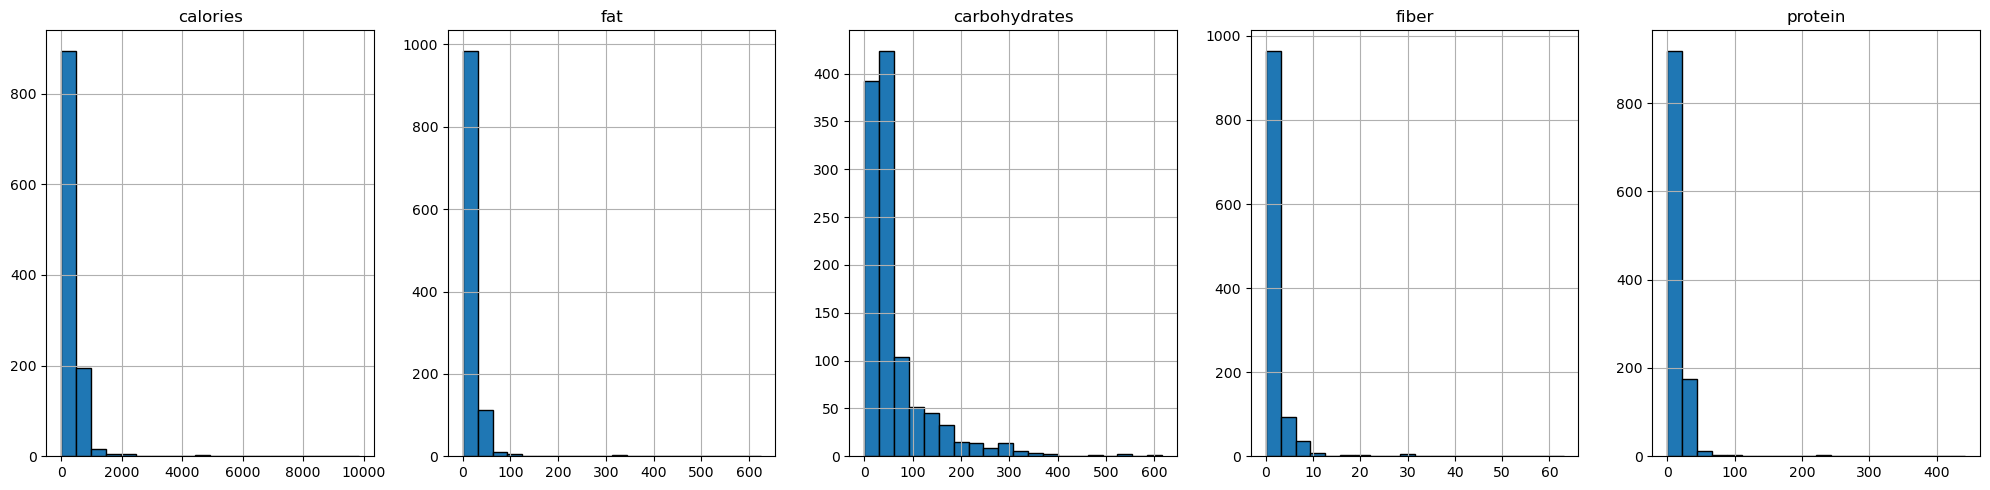

In [8]:
variables = menu_numeric.columns
n = len(variables)

fig, axes = plt.subplots(1, n, figsize=(20, 5))  # Set up the figure and axes

for ax, column in zip(axes, variables):
    ax.hist(menu_numeric[column].dropna(), bins=20, edgecolor='black')  # Generate histograms
    ax.set_title(column)
    ax.grid(True)  # Enable grid for better readability

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot